In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import sys
import chess
sys.path.insert(1, "Classes/")
from dataset_utils import encodeBoard
from ScoreGetter import ScoreGetter

#### We load our model.

In [2]:
engine = "Stockfish 13"
model = keras.models.load_model("../Models/SF_model_batch_58M")
engine_path = "C:/Users/Gaëtan/Downloads/stockfish_14.1_win_x64_avx2.exe"

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 131)]             0         
                                                                 
 dense (Dense)               (None, 131)               17292     
                                                                 
 dense_1 (Dense)             (None, 64)                8448      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,805
Trainable params: 25,805
Non-trainable params: 0
_________________________________________________________________


In [4]:
def plotPred (y_true, preds):
    plt.figure(dpi=150)
    ymin = np.min(y_true)
    ymax = np.max(y_true)
    plt.scatter(y_true, preds, label=f"Score: {r2_score(y_true, preds)}")
    plt.plot([ymin, ymax], [ymin, ymax], '-.', color='r', label="predicted values = true values")
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.legend()
    
def r2_score (y_true, preds):
    return 1 - (np.sum(np.square(preds - y_true)) / np.sum(np.square(preds - np.mean(preds))))

#### We load our test dataset

In [5]:
test_df = pd.read_csv("D:/IA/Deep_ViCTORIA/Datasets/" + engine + "/test_dataset.csv")
features = test_df.columns[:-1]
cps = test_df.columns[-1]

boards = test_df[features].values
scores = test_df[cps].values
print(f"{boards.shape[0]} test positions.")
preds = model.predict(boards).flatten()

112036 test positions.


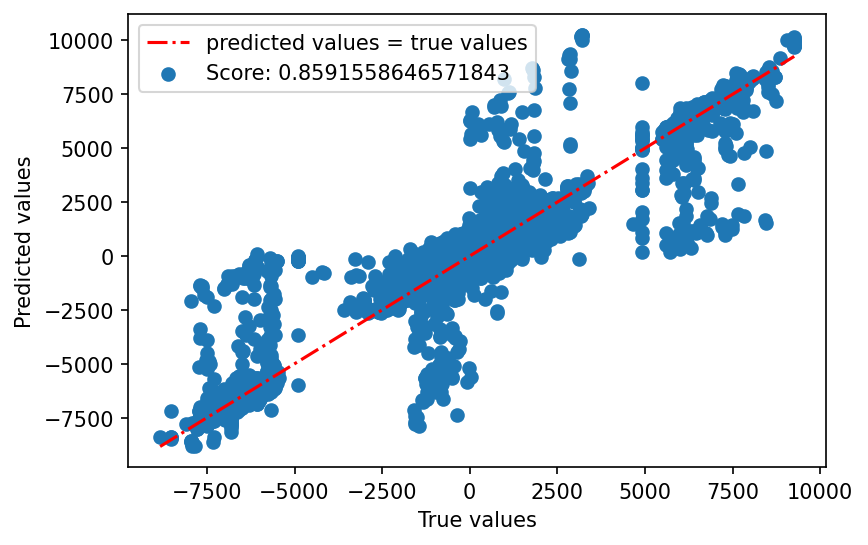

In [6]:
plotPred(scores, preds)

#### We can test our model with some positions.

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
stockfish score: 31
pred score: 20


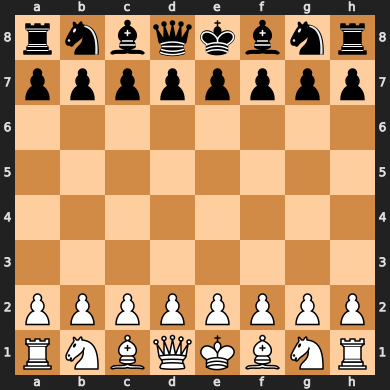

In [7]:
def test_position (fen):
  score_getter = ScoreGetter(engine_path, "eval", "go depth 1")

  print(fen)
  e = np.array(encodeBoard(fen)).reshape(1, -1)
  print(f"stockfish score: {score_getter.getScore(fen)}")
  print(f"pred score: {int(model.predict(e).flatten()[0])}")

  return chess.Board(fen)

test_position("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1")